Hyper-Q Product Testing - Analytical Report

In [1]:
import subprocess
import sys
sys.path.append("../../analysis")

hyper = True
episodes = 100
interval = 5
warmups=10000
dyna_size = 250
q_type = "q"
memory = 1000
policy = "onpolicy"
obsession = True
randomize = True
dump = False
negpos = False
episodic = True

title = "LEM"
project_title = ""
if hyper :
    title = f"{title} Hyper "
    project_title = "hyper"

title = f"{title} {q_type.upper()} Heatmap e{episodes} w{warmups} m{memory}"
project_title = f"{project_title}-{q_type}-{episodes}x{interval}-{policy}-w{warmups}-mem{memory}"

if dyna_size > 0 :
    title = f"{title} {dyna_size} Dyna x 75"
    project_title = f"{project_title}-dyna-{dyna_size}-75"
else :
    title = f"{title} No Dyna"

if obsession:
    title = f"{title} Obsession"
    project_title = f"{project_title}-obsession"



In [2]:
with open("input.in","w") as fp :
    fp.write(f"{episodes}\n")
    fp.write(f"{interval}\n")
    fp.write(f"memory_size={memory}\n")
    if episodic:
        fp.write("episodic\n")
    fp.write(f"{policy}\n")
    if(hyper) :
        fp.write("hyper\n")
    if negpos:
        fp.write("negpos\n")
    if(obsession) :
        fp.write("obsession\n")
    fp.write(f"dyna_size={dyna_size}\n")
    fp.write("dyna_iters=75\n")
    fp.write(f"warmup={warmups}\n")
    fp.write("a=1,.9999997,.65\n")
    fp.write("g=0.997,1\n")
    fp.write("e=0.9,.9999991,.1\n")
    fp.write("h=0.6,.99999991,0.0\n")
    fp.write(f"{q_type}\n")


In [3]:
s = subprocess.check_output([f"../Game/bin/x64/Release/Rocket2.exe","/in=input.in"],stderr=subprocess.STDOUT)
o = s.decode('utf-8')
print(o)


Reading input from input.in
cmdline: 100
cmdline: 5
cmdline: memory_size=1000
cmdline: episodic
cmdline: onpolicy
cmdline: hyper
cmdline: obsession
cmdline: dyna_size=250
cmdline: dyna_iters=75
cmdline: warmup=10000
cmdline: a=1,.9999997,.65
cmdline: g=0.997,1
cmdline: e=0.9,.9999991,.1
cmdline: h=0.6,.99999991,0.0
cmdline: q
g=0.997, decay=1, min=0.997
e=0.9, decay=0.9999991, min=0.1
a=1, decay=0.9999997, min=0.65
t=0.95, decay=1, min=0.95
Q enabled
HYPER enabled
Dyna enabled 250
Dyna freq 0.2
Memory enabled 1000 EPISODIC
warmups enabled 10000
ON Policy Evaluation
==Q==
Num Actions=1000/1000, state offset=0, action offset=0
==Q==
Num Actions=100/100, state offset=0, action offset=0
==Q==
Num Actions=360/360, state offset=0, action offset=0
== Env Metrics ==
   Total Reward: 302.483041348228
   Average Reward: -191.475710500401 over 121 episodes
   # Actions Taken: 4
   Episodes Take: 27.92 ms
   Total Episode Time: 3378.51 ms
   Reminiscing Takes: 3.81 ms
   Total Reminiscing Time: 38

In [4]:

import HeatMap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
#
# Load the files manifest and process the heatmaps for each files
#
with open("frames.txt") as fp:
    l = fp.readlines()
    fig,ax = plt.subplots(figsize=(11,8))
    ylabels = [f'Action {i}' for i in range(0,8)]
    png_files = []
    for s in l :
        s = s.strip()
        q1 = np.loadtxt(s,delimiter=',',usecols=range(8))
        fig,ax1 = plt.subplots(figsize=(11,8))
        im,_ = HeatMap.heatmap(q1.T, ylabels,None,ax=ax1,cmap="RdBu",cbarlabel=f"{q_type.upper()} Value",aspect='auto')
        ax1.title.set_text(title)
        fname = s.replace(".csv","_heatmap.png")
        fig.savefig(fname, facecolor=fig.get_facecolor())
        png_files.append(fname)
        plt.close(fig)
plt.close()



In [5]:
import asciiv
colors = {
    '+' : (255,255,255),
    '-' : (255,255,255),
    '/' : (255,255,255),
    '\\' : (255,255,255),
    '~' : (0,255,0),
    '*' : (255,0,0)
}

import os
ir = range(interval-1,episodes,interval)
for i in ir :
    fname = f'eval-{i}-{episodes}x{interval}-{policy}.log'
    gif_name = f'eval-{i}-{episodes}x{interval}-{policy}.gif'
    if os.path.exists(fname) :
        # Parse log file into frames
        log_frames = asciiv.parse_log_file(fname)

        # Render frames into images
        image_frames = [asciiv.render_frame(frame,colors=colors) for frame in log_frames]

        # Create animated GIF
        asciiv.create_animated_gif(image_frames, gif_name)
        print(gif_name)

fname = f'eval-best-{episodes}x{interval}-{policy}.log'
gif_name = f'eval-best-{episodes}x{interval}-{policy}.gif'
if os.path.exists(fname) :
    # Parse log file into frames
    log_frames = asciiv.parse_log_file(fname)

    # Render frames into images
    image_frames = [asciiv.render_frame(frame,colors=colors) for frame in log_frames]

    # Create animated GIF
    asciiv.create_animated_gif(image_frames, gif_name)
    print(gif_name)

eval-4-100x5-onpolicy.gif
eval-9-100x5-onpolicy.gif
eval-14-100x5-onpolicy.gif
eval-19-100x5-onpolicy.gif
eval-24-100x5-onpolicy.gif
eval-29-100x5-onpolicy.gif
eval-34-100x5-onpolicy.gif
eval-39-100x5-onpolicy.gif
eval-44-100x5-onpolicy.gif
eval-49-100x5-onpolicy.gif
eval-54-100x5-onpolicy.gif
eval-59-100x5-onpolicy.gif
eval-64-100x5-onpolicy.gif
eval-69-100x5-onpolicy.gif
eval-74-100x5-onpolicy.gif
eval-79-100x5-onpolicy.gif
eval-84-100x5-onpolicy.gif
eval-89-100x5-onpolicy.gif
eval-94-100x5-onpolicy.gif
eval-99-100x5-onpolicy.gif


In [6]:
import animate
from IPython.display import Image



In [7]:
ai = None
if len(png_files) > 0:
    ai = animate.animate(".",png_files)
    Image(url=ai)

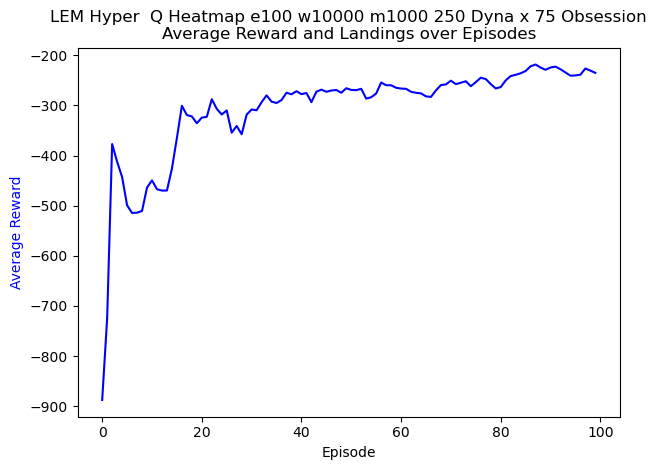

In [8]:


q1 = pd.read_csv(f"lem-result-{episodes}.csv",sep=',',header=0)
fig,ax1 = plt.subplots()
color = "blue"
ax1.set_xlabel("Episode")
ax1.set_ylabel("Average Reward", color=color)
ax1.plot(q1["avgreward"],color=color)
#ax2 = ax1.twinx()
#color = "red"
#ax2.set_ylabel("# Landings")
#ax2.plot(q1["landed"],color=color)
plt.title(f'{title}\nAverage Reward and Landings over Episodes')
fig.tight_layout()
fig_filename = f"{project_title}-Reward-Landing-Analysis.png"
fig.savefig(fig_filename, facecolor=fig.get_facecolor())
plt.show()

In [9]:
#landingpct = q1.landed.max() / q1.shape[0]
#print(f'Landing pct={landingpct*100.0}')
q1.describe()

,pct,altitude,vertspeed,fuel,time,horizspeed,reward,avgreward,epsilon,alpha
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,457.667543,1412.999426,214.799117,1294.246384,3838.296092,-235.138284,-307.765125,0.899960,0.999985
std,29.011492,623.517067,4182.386423,250.567059,788.822557,2781.804952,501.125101,102.525991,0.000023,0.000009
min,0.000000,-10.422308,-4483.507254,0.000000,283.769231,-3606.164488,-1506.806845,-887.399712,0.899920,0.999970
25%,24.750000,-3.528604,-1853.979861,0.000000,542.162350,2447.773440,-591.709470,-318.303648,0.899940,0.999978
50%,49.500000,51.028733,-796.651843,0.000000,1236.500000,4141.214907,-296.741572,-273.847528,0.899960,0.999985
75%,74.250000,820.409862,4421.066261,481.557794,1830.385417,5467.567210,36.184853,-254.759125,0.899980,0.999993
max,99.000000,2462.221160,11165.052922,667.908889,3631.000000,12745.082101,973.067059,-218.536663,0.900000,1.000000


In [10]:
import graphit

gfname = f'lem-result-{episodes}.csv'
window = 10000
goutput = f'lem-{episodes}-analysis.png'


In [11]:
graphit.dograph(gfname, window, goutput)

Average reward from hitting the surface: -363.09311844794775 +/- 285.4435649925416
Bounds of reward from hitting the surface: [-822.825360045206 , 479.293518011899]
Average speed at surface impact: -2033.543354768361 +/- 859.0486411487415
Average reward from fuel outage: -112.20128525883172 +/- 622.5355676950285
Bounds of reward from fuel outage: [-1506.80684538425 , 973.067059210251]
[ 1  3  4  5  6  7  8 10 12 17 18 19 20 23 24 25 27 28 31 36 38 40 41 45
 46 48 50 52 57 58 62 63 64 65 69 73 77 80 82 83 84 87 89 90 91 92 95 98
 99]


In [12]:
Image(url=goutput)
